## Import der verwendeten Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Zeigt Plots direkt im Notebook an:
%matplotlib inline

## Beispiel Klassifikation

Quellen:\
Müller, A.C. & Guido, S., Einführung in Machine Learning mit Python - Praxiswissen Data Science, O´Reilly (2017)\
https://github.com/amueller/introduction_to_ml_with_python

Als Beispiel für eine Klassifikationsaufgabe werden wir auf vorerst auf einem Datensatz zur Klassifizierung von drei verschiedenen Irisarten arbeiten. Der Iris-Datensatz enthält 150 Beobachtungen zu den drei verschiedenen Irisarten, die jeweils vier Merkmale von Irisblumen messen. Für jede Beobachtung erfolgt die Angabe der Länge und Breite der Kelch- und Blütenblätter, sowie die Angabe des Labels in Form der Irisart (setosa, versicolor, virginica).

### Kennenlernen des Datensatzes

Zunächst laden wir den Datensatz und betrachten ihn genauer. Die folgenden Schritte sind auch auf anderen sklearn-Datensätze anwendbar.

In [2]:
#Laden des Datensatzes
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Schlüssel des iris_dataset:\n", iris_dataset.keys())

Schlüssel des iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Die Ausgabe zeigt uns die Schlüssel des Dictionary `iris_dataset`. Diese Schlüssel geben Zugriff auf Informationen wie `data` (Merkmale der Blumen), `target` (Label/Irisart), `target_names` (Namen der Irisarten), `feature_names` (Bezeichnungen der Merkmale) und `DESCR` (Beschreibung des Datensatzes).

In [4]:
print(iris_dataset['DESCR'][:490] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
       
...


In [5]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [6]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


Die zweite Dimension hat die Größe 4, da es 4 Features gibt.

In [7]:
print("Die ersten fünf Beobachtungen mit den feature names:")
#Ausgabe der feature names
print(iris_dataset['feature_names'])
#Ausgabe der ersten fünf Beobachtungen
print(iris_dataset['data'][:5])

Die ersten fünf Beobachtungen mit den feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Jede Spalte entspricht hier einem Feature, dargestellt sind die ersten fünf Beobachtungen von Exemplaren der Blume Iris.

In [8]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [9]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


Das Label wird durch eine Zahl zwischen 0 - 2 realisiert, daher ist `target` eindimensional.

In [10]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [11]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Jede Zeile aus `data` gehört zu einem Label/einer Zahl aus `target`. Jede der drei Irisarten wird durch eine Zahl zwischen 0 und 2 repräsentiert.

### Train-Test-Split

Bevor wir uns den Datensatz genauer anschauen, teilen wir die Daten in Trainings- und Testdaten randomisiert auf. So können wir die Güte der Generalisierung des späteren Modells am besten bestimmen.

In [12]:
from sklearn.model_selection import train_test_split

# Randomisierte Aufteilung des Datensatzes in Trainings- und Testdatensatz. (75%,25%)
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Durch den `random_state = 0` erfolgt die Aufteilung randomiersiert und reproduizierbar. Damit ergibt sich für jeden Programmdurchlauf die gleiche zufällige Aufteilung. Diese Aufteilung ist damit auch unabhängig davon, auf welchem Device dieses Notebook ausgeführt wird, sofern die gleichen Versionen der Bibliotheken verwendet werden.

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Betrachtung des Datensatzes

Angesichts der vier Features im Iris-Datensatz stehen wir vor der Herausforderung, dass eine einfache Darstellung in einem 2-dimensionalen Streudiagramm nicht ausreicht, um alle Merkmale gleichzeitig zu visualisieren.  \
Hier bietet die Bibliothek `seaborn` mit der Funktion `pairplot` eine Möglichkeit, paarweise Streudiagramme der Features zu erstellen. Wir werden nun `pairplots` verwenden, um tiefer in die Struktur des Trainingsdatensatzes aus dem Iris-Datensatzes einzutauchen.

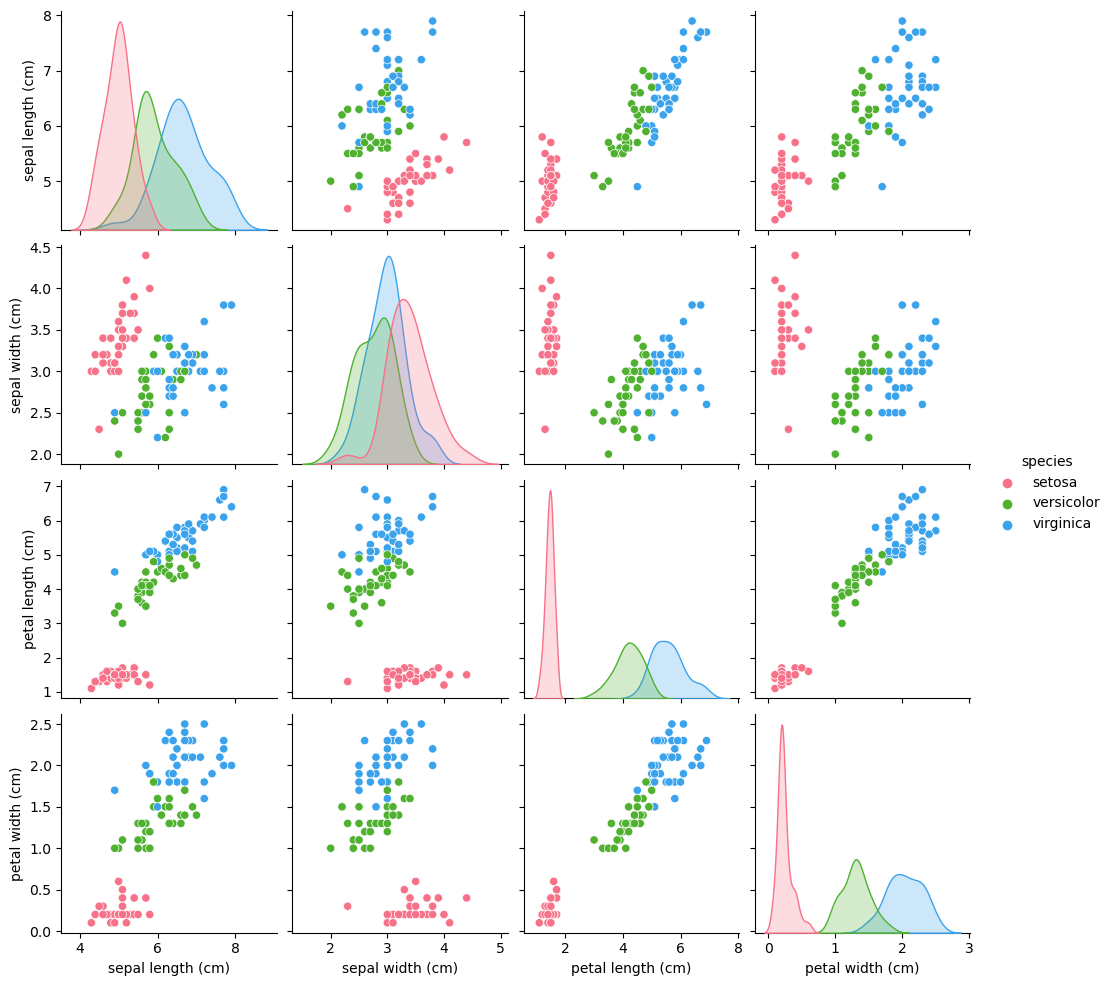

In [15]:
# Seaborn für fortgeschrittene Datenvisualisierung
import seaborn as sns

# Erstellung eines DataFrame aus den Trainingsdaten
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# Hinzufügen der Zielvariable (y_train) zum DataFrame
iris_dataframe['species'] = pd.Categorical.from_codes(y_train, iris_dataset.target_names)

# Erstellung des Streudiagramms in Matrix-Form mit Histogrammen (mehr als zwei Features)
# Anpassung des Farbschemas entsprechend den Iris-Arten aus iris_dataset.target_names
sns.pairplot(iris_dataframe, hue="species", palette="husl")
plt.show()

In dieser Matrix aus Streudiagrammen und Histogrammen werden die Features des Datensatzes jeweils gegenübergestellt. Bei ungleichen Features ergibt sich ein Streudiagramm, bei gleichen Features stellt ein Histogramm die Verteilung der Werte dieser Features dar. Durch die Farbgebung können die drei Iris-Arten repräsentiert werden. Die Plots oberhalb und unterhalb der Diagonalen sind jeweils zur Geraden `y=x` gespiegelt und liefern damit die gleiche Information. Für die vier Features des Datensatzes ergeben sich damit sechs 2-dimensionale Streudiagramme. Dies ermöglicht eine guten Überblick bei Datensätze mit wenigen Features. \
Hier ist beispielsweise gut zu erkennen, dass die Iris-Arten sich vor allem in den Features `petal length` und `petal width` unterscheiden. Dies ist im Streudiagramm mit den beiden Features zu erkennen.

### 1. k-nearest-neighbor

Zur Realisierung des k-nearest-neighbor (k-NN) Algorithmus verwenden wir die Klasse `KNeighborsClassifier` aus der `sklearn-Bibliothek`. Damit ist eine korrekte und effiziente Implementierung des k-NN Algorithmus sichergestellt.\
Durch den Parameter `n_neighbors` wird der Parameter `k` bestimmt. Erzeugen wir nun zunächst ein 1-NN Modell.

In [16]:
# Nutzung der Klasse aus sklearn
from sklearn.neighbors import KNeighborsClassifier
# 1-nearest-neighbor
knn = KNeighborsClassifier(n_neighbors=1)

Mit Hilfe der Methode `fit` können wir das `1-NN` Modell auf Basis der Trainingsdaten erstellen. 

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Vorhersagen der Iris-Art durch das Modell

Zum Test der Funktionalität sagen wir mit Hilfe unseres trainierten Modells das Label des ersten Testdatensatzes vorher und vergleichen es mit dem wahren (ground truth) Label.

In [18]:
# Auswahl einer Beobachtung aus dem Test-Datensatz
X_new = [X_test[0]]
print(X_new)

[array([5.8, 2.8, 5.1, 2.4])]


In [19]:
# Vorhersage des Labels
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])
print("Label:", [y_test[0]])
print("Label target name:", iris_dataset['target_names'][[y_test[0]]])

Prediction: [2]
Predicted target name: ['virginica']
Label: [2]
Label target name: ['virginica']


Der Test ist erfolgreich, da das vorhergesagte Label und das ground truth Label übereinstimmen.

#### Evaluierung des 1-nearest-neighbor Modells

Mit der `predict`-Methode des trainierten Modells können wir Labels für vorgegebene Datensätze generieren.

In [20]:
# Vorhersage der Labels des Testdatensatzes
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [21]:
# Überprüfung mit Labels des Testdatensatzes
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


Die `score`-Methode des Modells ermöglicht es uns, die Genauigkeit der Vorhersagen anhand von Testdaten zu bewerten und damit die Leistungsfähigkeit des Modells zu messen.

In [22]:
# Kompaktere Schreibweise
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Die Visualisierung des 1-nearest-neighbor Modells für einen Datensatz mit vier Features ist komplex zu erstellen und schwer interpretierbar. Dies würde eine 4-dimensionale Darstellung oder sechs 2-dimensionale Darstellungen benötigen, in welchen die Features gegenüber gestellt werden. Dies ist für den Datensatz bereits unter `Betrachtung des Datensatzes` geschehen.  

Bei der Gegenüberstellung der Features `petal width`und `petal length` zeigt sich im Streudiagramm eine gute Separierung der Iris-Arten des Trainingsdatensatzes. Daher wird nun ein 1-NN-Modell erzeugt, welches nur diese beiden Features betrachtet. Folgend werden die Entscheidungsgrenzen des Modells dargestellt und die wahren Label des Test- und Trainingsdatensatzes dargestellt. Zur Erstellung der Entscheidungsgrenzen wird für jeden Punkt im erstellten Mesh die Klasse durch das 1-NN Modell ermittelt.

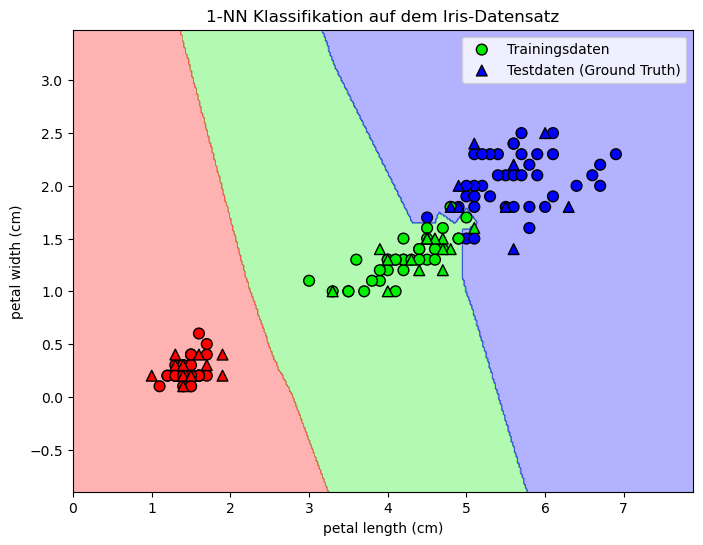

In [23]:
from matplotlib.colors import ListedColormap

# Laden des Iris-Datensatzes und Verwenden der letzten zwei Features
iris_dataset = load_iris()
X = iris_dataset.data[:, 2:4]
y = iris_dataset.target

# Aufteilung in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Trainieren des 1-NN-Modells
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = knn2.predict(X_test)

# Erstellen des Meshes für Entscheidungsgrenzen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Vorhersagen über das Mesh für Visualisierung der Entscheidungsgrenzen
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung mit Fargebung nach Klassen
plt.figure(figsize=(8, 6))
# Entscheidungsgrenzen
plt.contourf(xx, yy, Z, alpha = 0.3, cmap=ListedColormap(['red', '#00EE00', 'blue']))
# Trainingsdaten 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', '#00EE00', 'blue']),
            edgecolor='k', s=60, label='Trainingsdaten')
# Testdaten mit wahren Labeln
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', '#00EE00', 'blue']), 
            edgecolor='k', s=60, marker='^', label='Testdaten (Ground Truth)')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('1-NN Klassifikation auf dem Iris-Datensatz')
plt.legend()
plt.show()

In [24]:
print("Test set score: {:.2f}".format(knn2.score(X_test, y_test)))

Test set score: 0.97


Trotz der Reduzierung der Features, ist das Modell auf dem Testdatensatz weiterhin sehr genau. Das grüne Dreieck im blau hinterlegten Bereich stellt ein fehlerhaftes Label dar. Das Modell würde diesem Punkt die blaue Klasse zuordnen.

### k-nearest-neighbor

Im Folgenden wird das Verhalten des k-nearest-neighbor (k-NN) Algorithmus bei Variation des zentralen Hyperparameters `k` betrachtet. Der Hyperparameter `k` bestimmt die Anzahl der in Betracht gezogenen Nachbarn und ist wesentlich für die Balance zwischen Overfitting und Underfitting. \
Dazu wird nun der synthetische `Make Moons`-Datensatz aus `sklearn` verwendet, welcher durch den Parameter `noise` künstlich verrauscht werden kann.

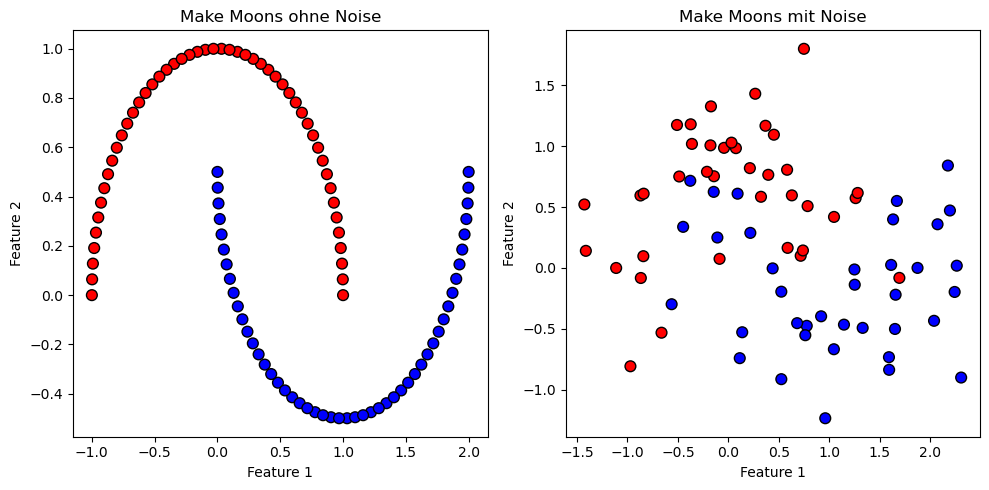

In [25]:
from sklearn.datasets import make_moons

# Generieren des Make Moons-Datensatzes
X, y = make_moons(n_samples=100, noise=0.4, random_state=0)
X_no_noise, y_no_noise = make_moons(n_samples=100, noise=0, random_state=0)

# Aufteilen in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Visualisierung
plt.figure(figsize=(10, 5))

# Plot für Datensatz ohne Noise
plt.subplot(1, 2, 1)
plt.scatter(X_no_noise[:, 0], X_no_noise[:, 1], c=y_no_noise, cmap=ListedColormap(['red', 'blue']),
            edgecolor='k', s=60)
plt.title('Make Moons ohne Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot für Datensatz mit Noise
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'blue']),
            edgecolor='k', s=60)
plt.title('Make Moons mit Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

Nun erfolgt die Auswertung der Trainings- und Testgenauigkeit mit ungeraden Werten für `k` im Bereich 1 bis 25. Trainiert wird das k-NN Modell auf dem verrauschten Trainingsdatensatz. 

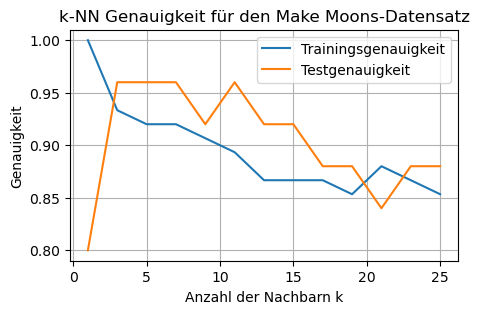

In [26]:
# Listen Verlauf der Accuracy
train_accuracy = []
test_accuracy = []

# Ungerade Werte für k im Bereich 1-25
k_values = range(1, 26, 2)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Visualisierung der Ergebnisse
plt.figure(figsize=(5, 3))
plt.plot(k_values, train_accuracy, label='Trainingsgenauigkeit')
plt.plot(k_values, test_accuracy, label='Testgenauigkeit')
plt.xlabel('Anzahl der Nachbarn k')
plt.ylabel('Genauigkeit')
plt.title('k-NN Genauigkeit für den Make Moons-Datensatz')
plt.legend()
plt.grid()
plt.show()

Der Plot zeigt, dass bei kleinen k-Werten eine hohe Trainingsgenauigkeit erreicht wird, während die Testgenauigkeit relativ gering ausfällt – ein deutlicher Hinweis auf Overfitting. Um diesen Effekt besser zu verstehen, werden wir uns nun die Entscheidungsgrenzen für eine Auswahl von k-Werten genauer anschauen.

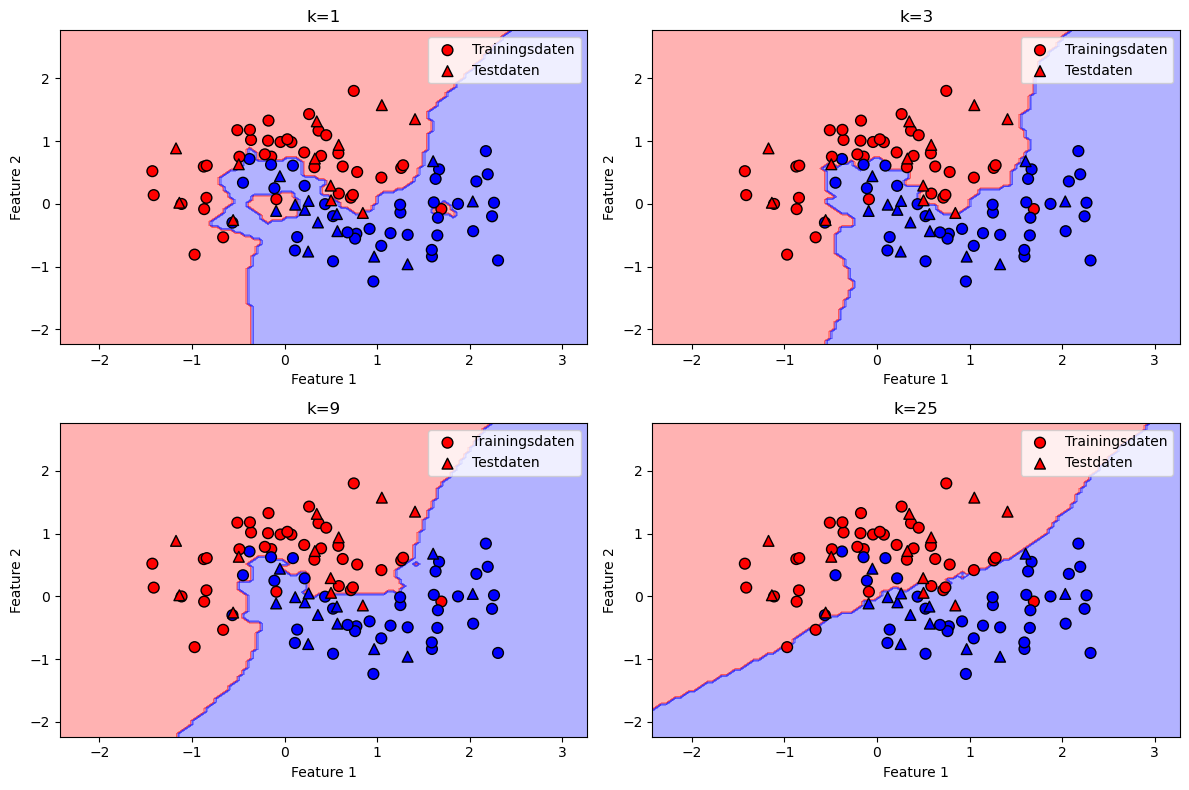

In [27]:
# Erstellen der Plots mit Entscheidungsgrenzen der k-NN Modelle für k = 1, 3, 9 und 25. 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for ax, k in zip(axes.flatten(), [1, 3, 9, 25]):
    # Erstellen des k-NN Modells und Training
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Erstellen eines Meshes für die Entscheidungsgrenze
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    # Vorhersage für jeden Punkt im Mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Erstellen der Plots
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'blue']),
               edgecolor='k', s=60, label = "Trainingsdaten")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'blue']),
               edgecolor='k', s=60, marker = "^", label = "Testdaten")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'k={k}')
    ax.legend()
    
plt.tight_layout()
plt.show()

Die Entscheidungsgrenzen des `overfittenden` 1-NN Modells zeigen zwar bereits die grobe Form der beiden Halbkreise des unverrauschten `Make Moons`-Datensatzes, jedoch werden auch einzelne Ausreißer erlernt, was zu einer schlechteren Generalisierung führt. Dies wird durch die Entscheidungsgrenzen deutlich sichtbar. \
Die Modelle bei `k=3` und `k=9` repräsentieren den Datensatz gut und generalisieren effektiv. Trotz der künstlichen Verrauschung ist die Form der beiden Halbkreise klar erkennbar. \
Das k-NN Modell mit `k=25` bietet hingegen keine gute Repräsentation des `Make Moons`-Datensatzes und neigt zum `Underfitting`. Das Modell ist zu einfach, um die grundlegenden Muster im Datensatz zu erfassen. 

Durch Veränderung der Parameter `n_samples` und `noise` des `Make Moons`-Datensatzes zeigt sich, dass andere k-Werte zu besseren Ergebnissen führen. Daher sollte `k` stets an den spezifischen Datensatz angepasst werden - dies nennt man `Hyperparameteroptimierung`.

## 2. Support Vector Machines

Dieser Abschnitt beschäftigt sich mit dem Algorithmus der `Support Vector Machines` (SVMs) zur Klassifizierung von Datensätzen mit zwei oder mehr Features. Dabei erfolgt zunächst die Betrachtung linearer Klassifizierer mit dem sklearn-Datensatz `Make Blobs`. Mit dem bekannten `Make Moons`-Datensatz betrachten wir die Grenzen linearer Klassifizierer, wenden nichtlineare Klassifizierer an und betrachten die Wirkung im 3-dimensionalen Raum.     

### Einstieg in die SVMs

Beginnen wir mit einem praktischen Beispiel von SVMs am Beispiel des `Make Blobs`-Datensatzes. Der synthetische `Make Blobs`-Datensatz eignet sich aufgrund seiner geringen Komplexität sehr gut für einen Einstieg in den Algorithmus. Dazu laden wir den Datensatz und stellen ihn in einem Streudiagramm dar. Diese Visualisierung ist ein entscheidender Schritt, um die räumliche Verteilung der Daten und die daraus resultierenden Herausforderungen für den SVM-Algorithmus zu verstehen.

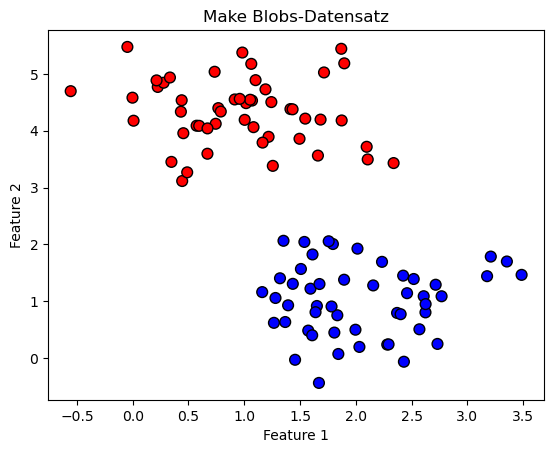

In [28]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Erstellen des Make Blobs-Datensatzes
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Visualisierung des Datensatzes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60)
plt.title('Make Blobs-Datensatz')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Die beiden Klassen im Make Blobs-Datensatz sind klar separierbar, was sie ideal für die Verwendung eines linearen Klassifizierers macht. Nachdem wir den Datensatz in Trainings- und Testsets aufgeteilt haben, folgt das Training und die Evaluation unseres SVM-Modells.

In [29]:
from sklearn.svm import SVC

# Aufteilen des Make Blobs-Datensatzes in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Erstellen und Trainieren des linearen SVM-Modells
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluation des Modells
print("Test set score: {:.2f}".format(svm_model.score(X_test, y_test)))

Test set score: 1.00


Die Testgenauigkeit ist sehr hoch, das Modell kann alle Testdaten richtig klassifizieren. 

Betrachten wir nun die Trenngerade und die Entscheidungsgrenze unseres SVM-Modells, um zu verstehen, wie das Modell die Klassen trennt. Zudem stellen wir die Trainings- und Testdaten im Streudiagramm dar. 

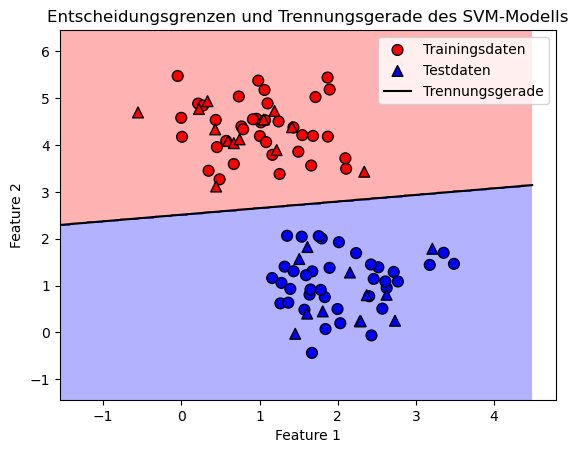

In [30]:
# Erstellen eines Meshes zur Darstellung der Entscheidungsgrenze
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))

# Vorhersage für jeden Punkt im Mesh durch SVM-Modell
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung der Entscheidungsgrenze
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'blue']),
            edgecolor='k', s=60, label = "Trainingsdaten")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'blue']),
            edgecolor='k', s=60, marker = "^", label = "Testdaten")

# Berechnung der Trennungsgeraden
m = -svm_model.coef_[0, 0] / svm_model.coef_[0, 1]
b = -svm_model.intercept_[0] / svm_model.coef_[0, 1]
xx_lin = np.linspace(x_min, x_max)
yy_lin = m * xx_lin + b

# Zeichnen der Trennungsgeraden
plt.plot(xx_lin, yy_lin, 'k-', label='Trennungsgerade')

plt.title('Entscheidungsgrenzen und Trennungsgerade des SVM-Modells')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Die perfekte Trennung der Klassen im `Make Blobs`-Datensatz durch die Trennungsgerade und Entscheidungsgrenzen des SVM-Modells stellt ein ideales Szenario dar.

In der Praxis sind die Daten jedoch oft komplexer und schwieriger zu trennen. Dazu betrachten wir nun den bekannten Iris-Datensatz mit den Features `petal width` und `petal length`, welche sich bereits beim k-NN Algorithmus als gute Features zur Klassifizierung der Iris-Art herausgestellt haben. Die Reduzierung auf diese beiden Features ermöglicht uns eine 2-dimensionale Darstellung der Daten.\
Nach dem Laden des Datensatzes mit den beiden Features trennen wir die Daten in Trainings- und Testdaten und trainieren das lineare SVM-Modell. 

In [31]:
# Laden des Iris-Datensatzes und Verwenden der letzten zwei Features
iris_dataset = load_iris()
X = iris_dataset.data[:, 2:4]
y = iris_dataset.target

# Aufteilung in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Trainieren des 1-NN-Modells
svm_iris = SVC(kernel='linear')
svm_iris.fit(X_train, y_train)

# Evaluation des Modells
print("Test set score: {:.2f}".format(svm_iris.score(X_test, y_test)))

Test set score: 0.97


Die Auswertung der Testgenauigkeit zeigt, dass das lineare SVM-Modell, ähnlich wie das 1-NN-Modell, diesen Datensatz zuverlässig klassifizieren kann. Um unser Verständnis zu vertiefen und die Unterschiede zwischen den Modellen besser zu erfassen, visualisieren wir erneut die Entscheidungsgrenzen. Diese Visualisierung, zusammen mit den Test- und Trainingsdaten, erlaubt Einblicke in die strukturellen Unterschiede und das Trennungsverhalten im Vergleich zum `1-NN-Modell`.

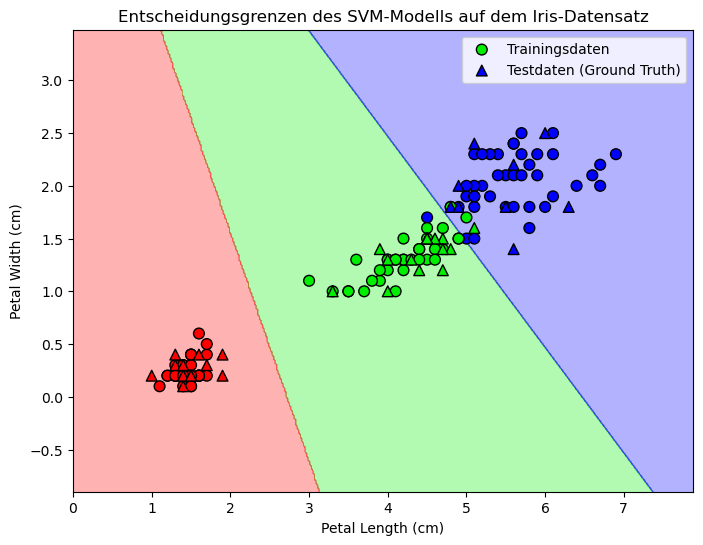

In [32]:
# Erstellen eines Meshes zur Darstellung der Entscheidungsgrenze
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Vorhersagen über das Mesh für Visualisierung der Entscheidungsgrenzen
Z = svm_iris.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung der Entscheidungsgrenzen des SVM-Modells
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha = 0.3, cmap=ListedColormap(['red', '#00EE00', 'blue']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', '#00EE00', 'blue']),
            edgecolor='k', s=60, label='Trainingsdaten')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', '#00EE00', 'blue']),
            edgecolor='k', s=60, marker='^', label='Testdaten (Ground Truth)')
plt.title('Entscheidungsgrenzen des SVM-Modells auf dem Iris-Datensatz')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

Der Plot zeigt, dass sich die Klassen im Iris-Datensatz auch gut durch lineare Klassifizerer trennen lassen. Im Gegensatz dazu erstellt der k-nearest-neighbor-Algorithmus nicht lineare Grenzen. Dadurch kann der k-NN-Algorithmus sowohl mit linearen als auch mit nichtlinearen Klassifizierungsproblemen umgehen, ohne präzises Vorwissen über die Datenstruktur zu benötigen.\
Auf der anderen Seite erlaubt die Flexibilität des SVM-Algorithmus, spezifisches Wissen aus der Datenauswertung einzubringen, indem beispielsweise passende nichtlineare Funktionen verwendet werden. Damit sind SVM-Modelle häufig komplexer in der Handhabung, können jedoch auch präzisere Ergebnisse liefern.\
Um diese Anpassungsfähigkeit von SVMs an unterschiedliche Datenstrukturen zu demonstrieren, wenden wir uns nun dem verrauschten Make Moons-Datensatz zu. Dieser Datensatz ist besonders geeignet, um die Herausforderungen und Potenziale nichtlinearer Klassifizierung zu illustrieren. Zuerst versuchen wir, diesen Datensatz mit einem linearen SVM-Modell zu klassifizieren, um die Grenzen linearer Ansätze zu verstehen.

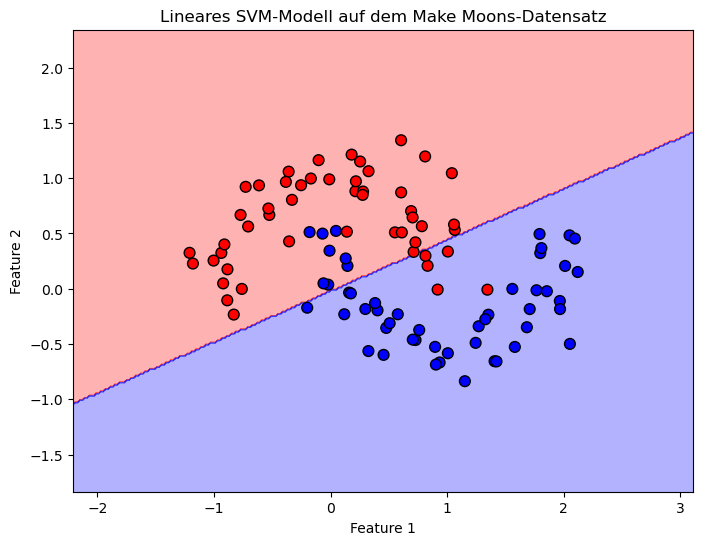

In [33]:
# Generieren des verrauschten Make Moons-Datensatzes
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# Aufteilen in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Erstellen und Trainieren des linearen SVM-Modells
svm_moons = SVC(kernel='linear')
svm_moons.fit(X_train, y_train)

# Erstellen des Meshes für die Entscheidungsgrenze
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = svm_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung der Daten und der Entscheidungsgrenze
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60)
plt.title('Lineares SVM-Modell auf dem Make Moons-Datensatz')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Die Darstellung zeigt, dass die Komplexität des linearen SVM-Algorithmus nicht ausreicht, um die komplexe Datenstruktur des Make Moons-Datensatzes zu erlernen. Es handelt sich hierbei um ein nichtlineares Klassifizierungsproblem. Dies ähnelt dem Verhalten des k-NN Algorithmus bei k=25, wo eine zu geringe Komplexität des Modells zu Underfitting führt. Betrachten wir zunächst unsere Testgenauigkeit.

In [34]:
# Evaluation des Modells
print("Test set score: {:.2f}".format(svm_moons.score(X_test, y_test)))

Test set score: 0.84


Das lineare SVM-Modell liefert eine grundlegende Generalisierung, stellt jedoch die Struktur des verrauschten Make Moons-Datensatzes nicht gut dar, wie die Visualisierung der Entscheidungsgrenze aufzeigt.\
Um die Komplexität unseres SVM-Algorithmus an den verrauschten `Make Moons`-Datensatz anzupassen, nutzen wir `PolynomialFeatures`, um höherdimensionale Features zu erzeugen. Dieser Prozess beinhaltet die Erstellung von Kombinationen der ursprünglichen Features bis zu einem bestimmten Grad. Beispielsweise werden bei einem Grad von 2 aus zwei Features (x1, x2) die Kombinationen (x1, x2, x1^2, x1 x2, x2^2) erzeugt.\
Diese Transformation ermöglicht es dem linearen SVM-Modell, die nichtlinearen Muster im Datensatz besser zu erfassen. Indem wir Features höherer Ordnung einbeziehen, erhöhen wir die Fähigkeit des Modells, die komplexe Struktur des Datensatzes besser abzubilden.

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Erzeugen von Polynom-Features
poly = PolynomialFeatures(degree=3, include_bias = False)
X_poly = poly.fit_transform(X)
print(f"Shape des transformierten Datensatzes: {X_poly.shape}")

Shape des transformierten Datensatzes: (100, 9)


Der transformierte Datensatz hat nun insgesamt neun Features, die auf den beiden Ausgangsfeatures beruhen. Diese bestehen aus den Features selbst, ihren Quadraten, kubischen Termen und alle möglichen Kombinationen dieser.  
Berechnen wir nun die Entscheidungsgrenze des SVM-Modells basierend auf diesen Features.

Test set score: 0.96


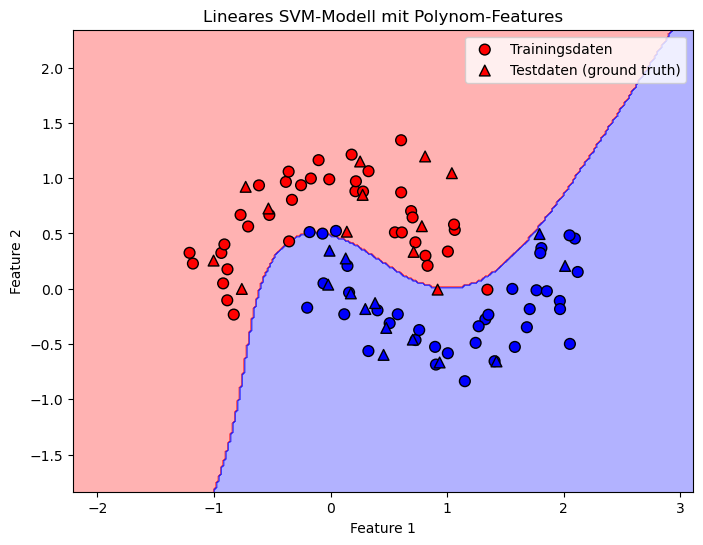

In [36]:
# Aufteilen des erweiterten Datensatzes in Trainings- und Testdatensatz
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, random_state=0)

# Erstellen und Trainieren des linearen SVM-Modells mit den Polynom-Features
svm_poly = SVC(kernel='linear')
svm_poly.fit(X_train_poly, y_train)
print("Test set score: {:.2f}".format(svm_poly.score(X_test_poly, y_test)))

# Mesh mit Polynomtransformation zur Vorhersage der Entscheidungsgrenze
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_poly.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Visualisierung der Entscheidungsgrenzen mit ursprünglichen Features
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X_train_poly[:, 0], X_train_poly[:, 1], c=y_train, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60, label = "Trainingsdaten")
plt.scatter(X_test_poly[:, 0], X_test_poly[:, 1], c=y_test, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60, marker = "^", label = "Testdaten (ground truth)")
plt.title('Lineares SVM-Modell mit Polynom-Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Durch das Hinzufügen von Features höherer Ordnung kann das SVM-Modell die Struktur des verrauschten Make Moons-Datensatzes abbilden, was sich in einer entsprechend höheren Testgenauigkeit widerspiegelt. Dabei ist zu beachten, dass der Kernel des SVM-Algorithmus weiterhin `linear` ist und im erweiterten, `9-dimensionalen Feature-Raum` weiterhin eine linare Lösung gefunden wird. Allerdings erscheint die Entscheidungsgrenze, wenn sie im ursprünglichen 2-dimensionalen Raum dargestellt wird, nicht mehr linear. Daher kann ein lineares Modell im höherdimensionalen Raum komplexe Muster abbilden.\
Alternativ kann auch direkt ein nicht linearer Kernel wie der `RBF-Kernel` genutzt werden, welcher ohne Feature-Transformation auskommt. 

Zum Abschluss dieses Abschnittes soll ein kurzes Beispiel dieses Verhalten illustrieren. Dazu wird ein weiterer synthetischer Datensatz erstellt.

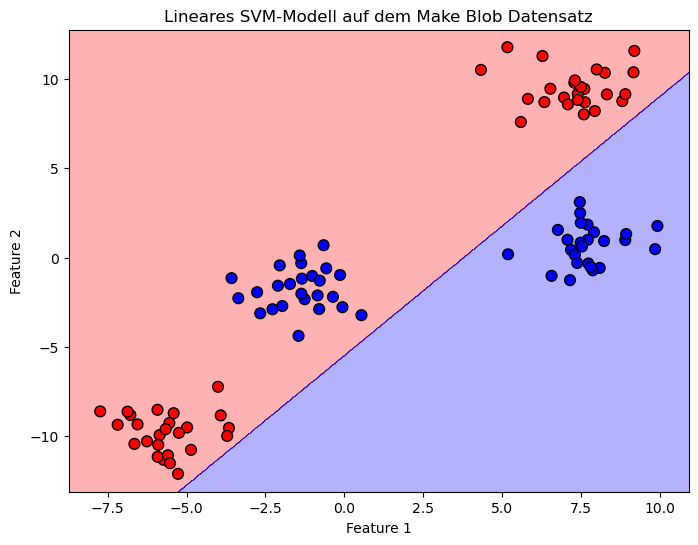

In [37]:
# Erstellen eines Make Blobs Datensatzes mit vier Blobs und zwei Klassen
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

# Erstellen und Trainieren des linearen SVM-Modells
svm_blob = SVC(kernel='linear')
svm_blob.fit(X, y)

# Erstellen des Meshes für die Entscheidungsgrenze
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = svm_blob.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung der Daten und der Entscheidungsgrenze
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60)
plt.title('Lineares SVM-Modell auf dem Make Blob Datensatz')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Erneut ist zu erkennen, dass ein lineares SVM-Modell die Komplexität dieses speziellen Make Blobs-Datensatzes nicht abbilden kann. \
Diesmal fügen wir ein nichtlineares Feature hinzu, indem wir das `Feature 2` quadrieren. Die blaue Klasse kann nämlich aus Sicht des Features 2 durch eine Parabel von der roten Klassen getrennt werden. Indem wir ein weiteres, quadratisches Feature einbeziehen, schaffen wir einen erweiterten, `3-dimensionalen Feature-Raum`, der noch gut visualisierbar ist. In diesem Feature-Raum wird nun eine lineare Lösung gefunden. Im `9-dimensionalen Feature-Raum` aus dem letzten Bespiel verhält es sich genauso.

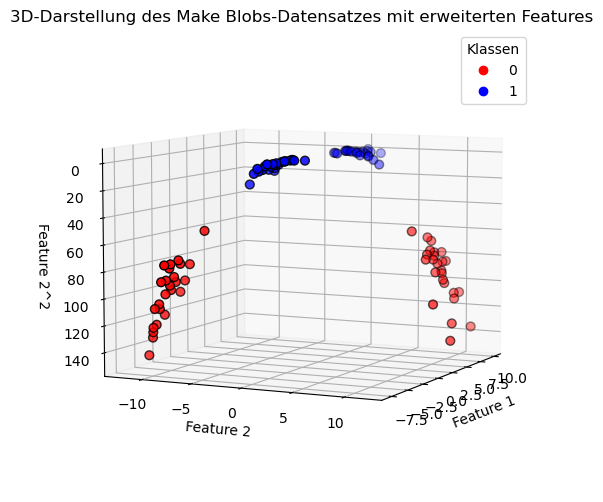

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Hinzufügen des quadrierten zweiten Features
X_new = np.hstack([X, X[:, 1:] ** 2])

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Anpassung des Winkels der Darstellung
ax.view_init(elev=-173, azim=-26)

# Visualisierung der Daten im erweiterten Feature-Raum
scatter = ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s = 40)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 2^2')
ax.legend(*scatter.legend_elements(), title="Klassen")
plt.title('3D-Darstellung des Make Blobs-Datensatzes mit erweiterten Features')
plt.show()

Bei Betrachtung des erweiterten, 3-dimensionalen Feature-Raums lässt sich bereits eine mögliche Trennung der Klassen durch eine Ebene vermuten. Im nächsten Schritt schauen wir uns die durch das lineare SVM-Modell ermittelte Trennebene an.

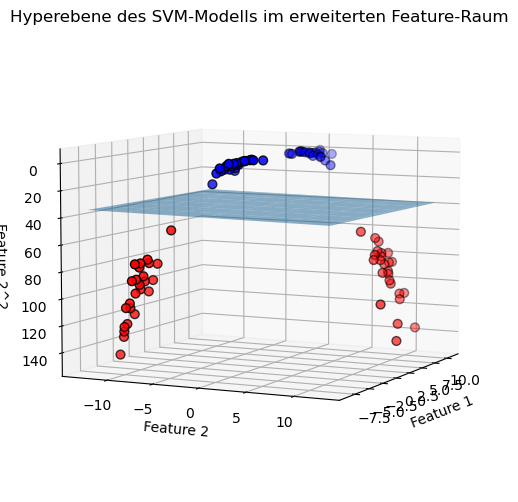

In [39]:
# Erstellen und Trainieren des linearen SVM-Modells im erweiterten Feature-Raum
svm_new = SVC(kernel='linear')
svm_new.fit(X_new, y)

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualisierung der Datenpunkte
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s = 40)

# Berechnung der Hyperebene
coef = svm_new.coef_.ravel()
intercept = svm_new.intercept_

# Erstellen eines Gitters für die Hyperebene
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
ZZ = (-coef[0] * XX - coef[1] * YY - intercept) / coef[2]

# Darstellung der Hyperebene
ax.plot_surface(XX, YY, ZZ, alpha=0.5, rstride=8, cstride=8)

# Anpassung des Winkels der Darstellung
ax.view_init(elev=-173, azim=-26)

# Benennung der Achsen
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 2^2')

plt.title('Hyperebene des SVM-Modells im erweiterten Feature-Raum')
plt.show()

Nachdem wir die lineare Trennebene im 3-dimensionalen Raum betrachtet haben, wenden wir uns nun den ursprünglichen, 2-dimensionalen Features des Make Blobs-Datensatzes zu. Diese Rückkehr ermöglicht es uns, das im erweiterten Raum trainierte Modell in seinem ursprünglichen Kontext zu bewerten. Indem wir die Entscheidungsgrenzen im 2D-Raum untersuchen, können wir veranschaulichen, wie das Modell die Klassen trennt.

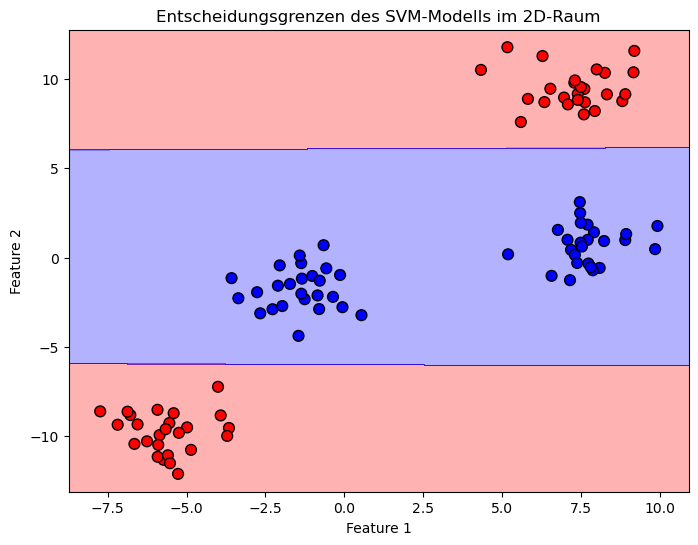

In [40]:
# Erstellen eines Gitters für die Visualisierung im 2D-Raum
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02), 
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))

# Anwendung der SVM-Vorhersage im 3-dimensionalen Raum, projiziert auf 2D
Z = svm_new.predict(np.c_[xx.ravel(), yy.ravel(), (yy**2).ravel()])
Z = Z.reshape(xx.shape)

# Visualisierung der Entscheidungsgrenzen mit den Ausgangsfeatures
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=60)
plt.title('Entscheidungsgrenzen des SVM-Modells im 2D-Raum')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Die Visualisierung der Entscheidungsgrenze zeigt, wie das im erweiterten Feature-Raum trainierte SVM-Modell die Klassen erfolgreich trennt. Durch das Hinzufügen des quadratischen Features verbessert sich das Modell deutlich. Trotz der linearen Lösung im 3-dimensionalen Raum, ist die Entscheidungsgrenze im 2-dimensionalen Raum nicht mehr linear. Bei genauer Betrachtung ist aus Sicht des `Features 2` ein Ausschnitt einer `Parabel` zu erkennen.